## Import the relevant libraries


In [1]:
from sklearn.cluster import DBSCAN
import dbscan_helper as helper
import pandas as pd
%matplotlib inline

### Dataset 1

In [2]:
data_set_1=pd.read_csv('blobs.csv')
data_set_1.head()

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452


In [3]:
data_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
ds1=data_set_1.values

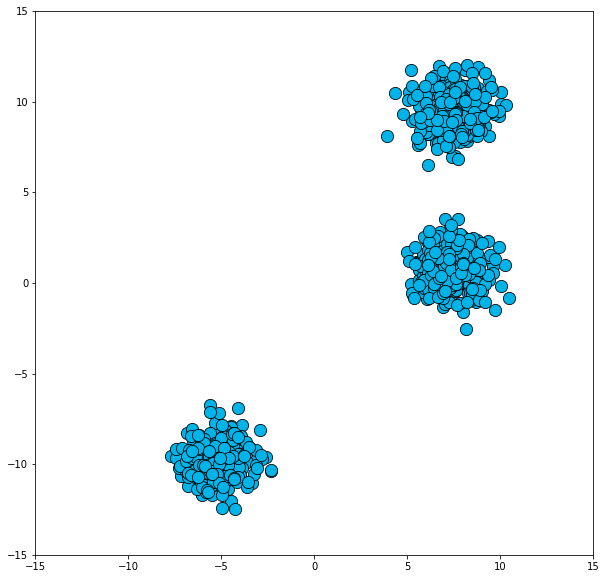

In [5]:
helper.plot_dataset(ds1)

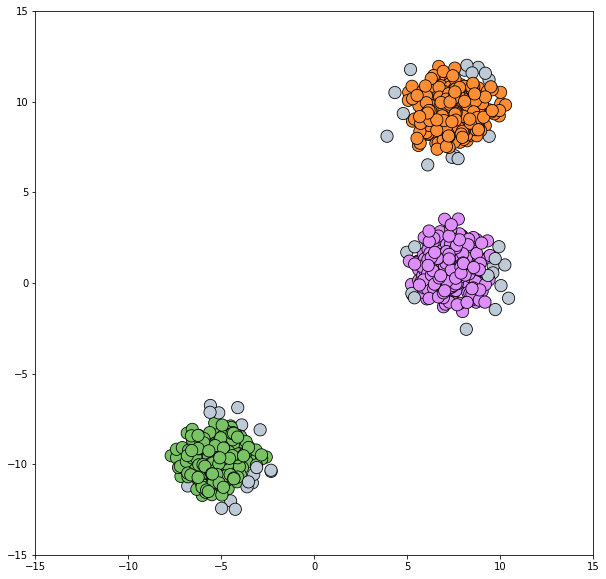

In [6]:
dbscan=DBSCAN()
clustering_labels=dbscan.fit_predict(ds1)
helper.plot_clustered_dataset(ds1,clustering_labels)

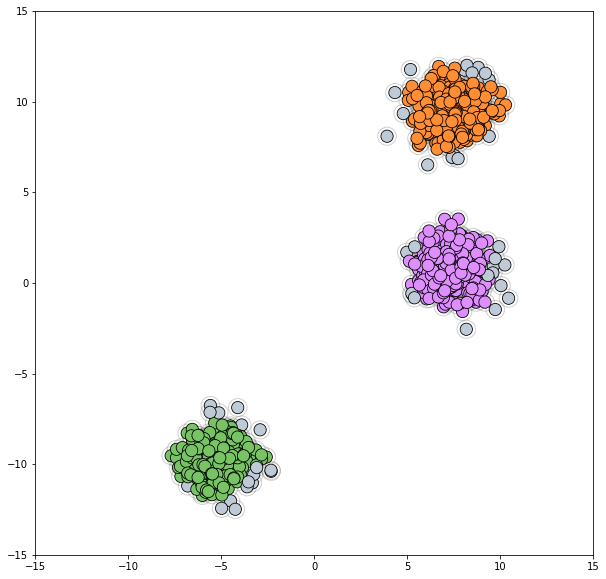

In [7]:
helper.plot_clustered_dataset(ds1,clustering_labels, neighborhood=True)

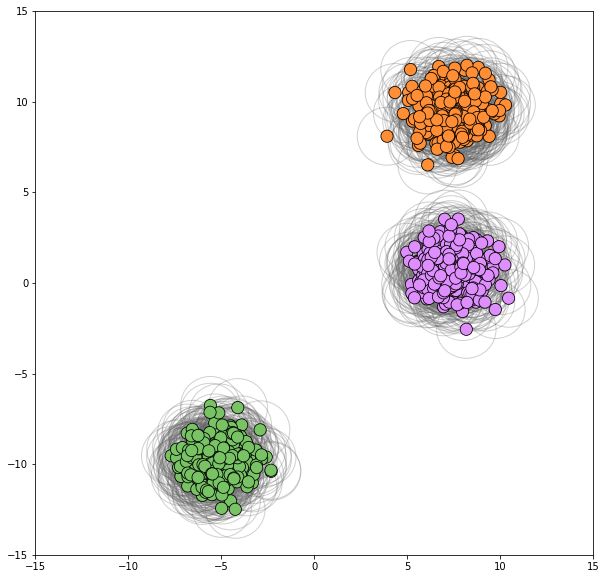

In [8]:
epslion=1.6
dbscan=DBSCAN(eps=epslion)
clustering_labels=dbscan.fit_predict(ds1)
helper.plot_clustered_dataset(ds1,clustering_labels, neighborhood=True,epsilon=epslion)

### Dataset 2

In [9]:
data_set_2=pd.read_csv('varied.csv')
data_set_2.head()

,0,1
0,-7.496770,-4.795778
1,-9.876978,-6.828510
2,2.209805,0.316721
3,1.820086,0.265529
4,-9.256011,-5.956185


In [10]:
data_set_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [11]:
ds2=data_set_2.values

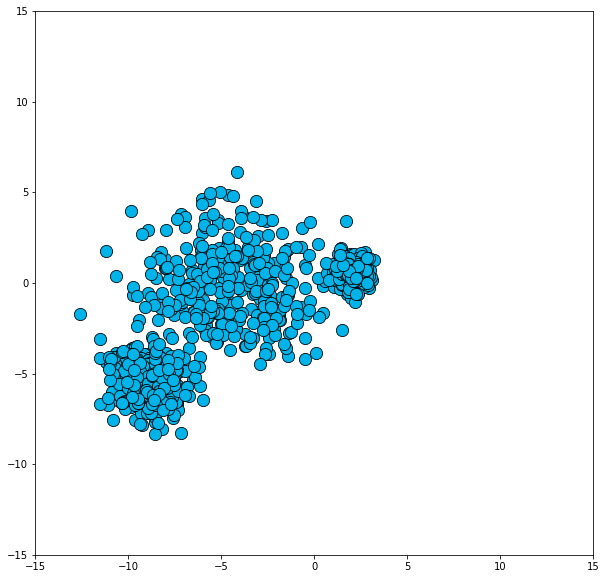

In [12]:
helper.plot_dataset(ds2)

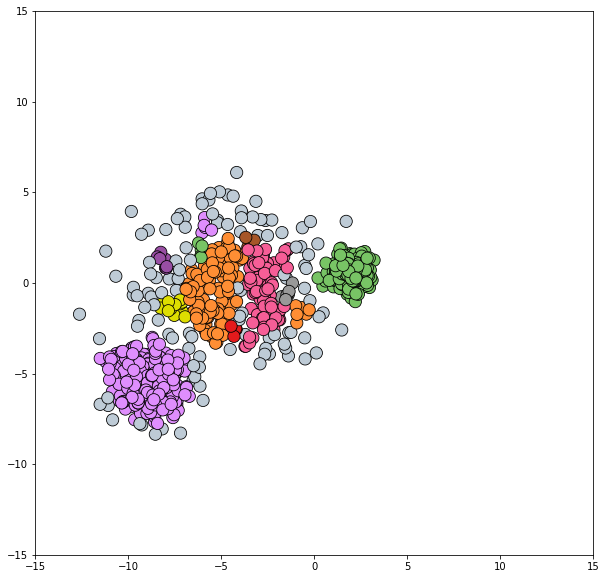

In [13]:
dbscan=DBSCAN()
clustering_labels=dbscan.fit_predict(ds2)
helper.plot_clustered_dataset(ds2,clustering_labels)

- This clustering could make sense in some scenarios, but it seems rather arbitrary. Looking at the dataset, we can imagine at least two scenarios for what we'd want to do:

    - Scenario 1: Break the dataset up into three clusters: the blob on the left, the blob on the right, and the central area (even though it's less dense than the blobs on either side).
    - Scenario 2: Break the dataset up into two clusters: the blob on the left, and the blob on the right. Marking all the points in the center as noise.

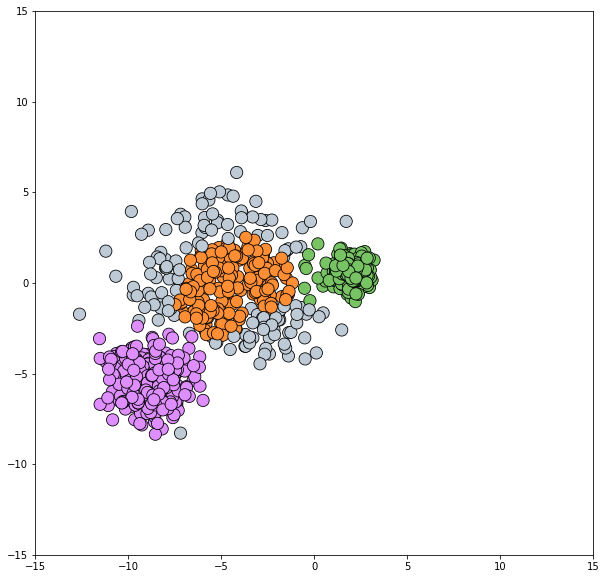

In [14]:
epslion=1.32
min_points=40
dbscan=DBSCAN(eps=epslion,min_samples=min_points)
clustering_labels=dbscan.fit_predict(ds2)
helper.plot_clustered_dataset(ds2,clustering_labels)

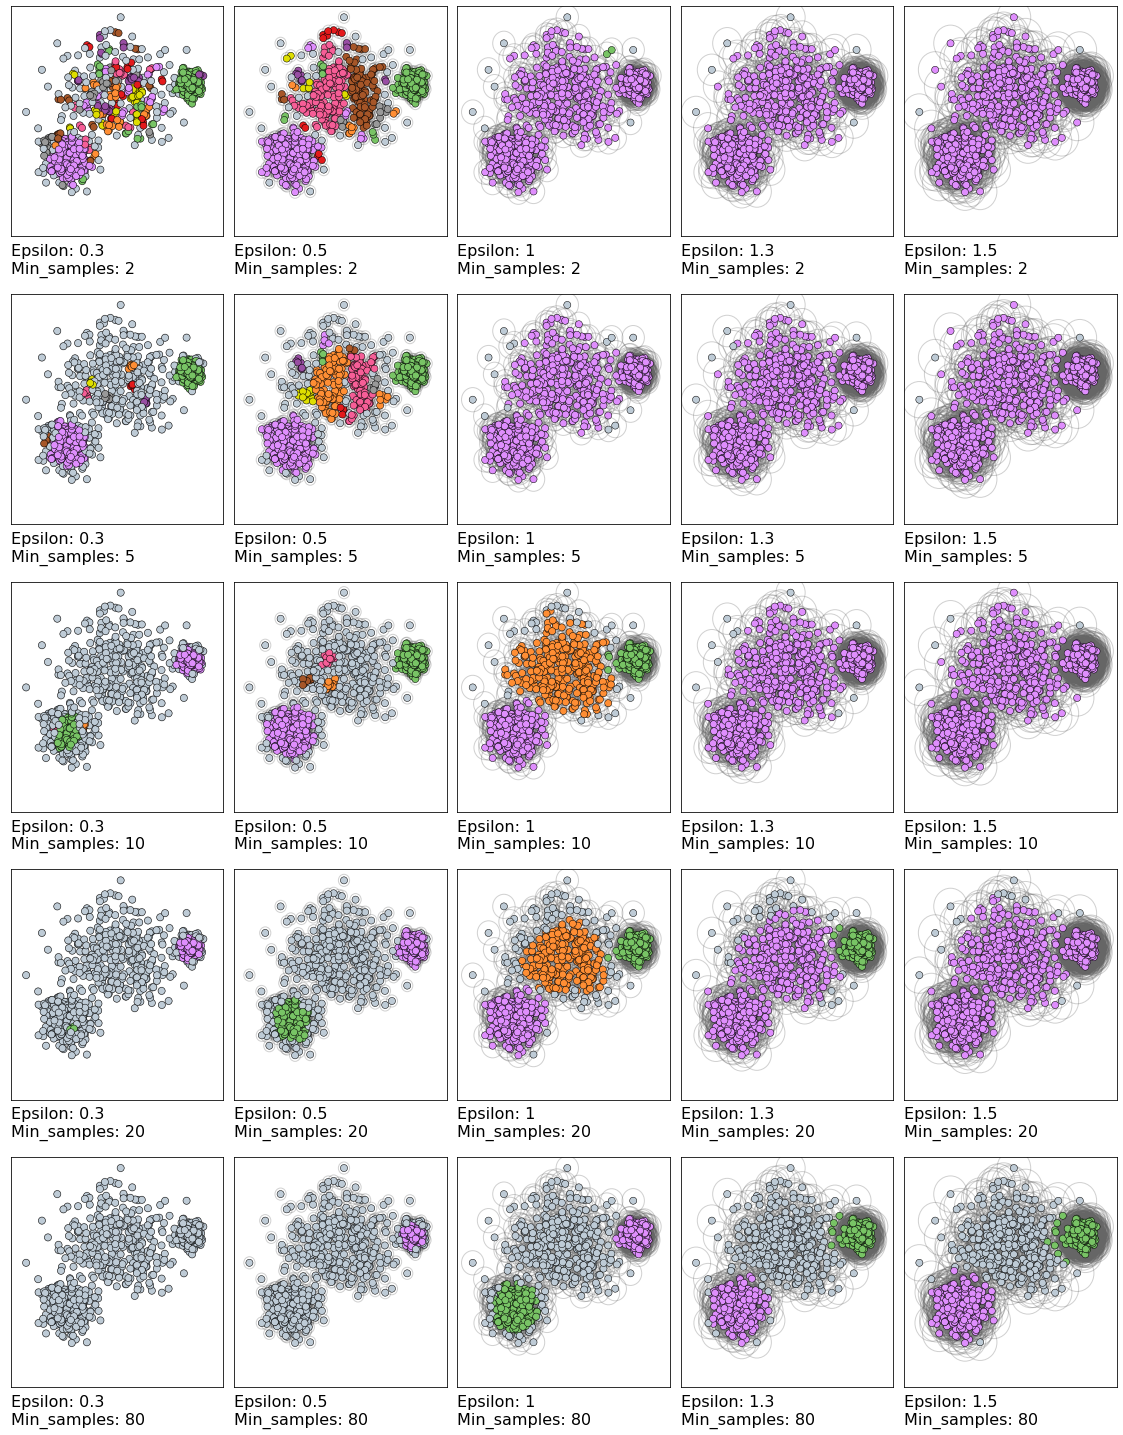

In [15]:
eps_values = [0.3, 0.5, 1, 1.3, 1.5]
min_samples_values = [2, 5, 10, 20, 80]
helper.plot_dbscan_grid(ds2,eps_values,min_samples_values)

- Epsilon=1, min_samples=10 seems to do a good job here. for scenario 1

- Epsilon=1.3, min_samples=80 does the best job to satisfy scenario 2